In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import pickle
import gzip
from sklearn.model_selection import train_test_split


2025-05-02 16:16:11.425343: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
soap_path = '/Users/cadenmyers/billingelab/dev/ml4ms_bandgap_final/data/padded_soap_descriptors.pkl.gz'
# Step 1: Read the compressed pickle
with gzip.open(soap_path, 'rb') as f:
    padded_df = pickle.load(f)


In [26]:
print(padded_df.shape)
padded_df.head(10)

(5358, 4)


,formula,mpid,gap opt,padded_soap
0,MgAlPO5,mp-6596,5.2711,"[[7.834700877986906e-05, -0.000248821014237357..."
1,KBePO4,mp-7324,5.6141,"[[1.224395792223083e-07, -5.548160208843811e-0..."
2,As,mp-158,0.0221,"[[0.18087236729129627, 0.4693173276837286, 0.5..."
3,CuHOF,mp-24242,0.0038,"[[8.408499979827601e-07, -6.4356783799753e-06,..."
4,AgI,mp-567809,1.2599,"[[0.18083827914220227, 0.4690888310062766, 0.5..."
5,ZrBrN,mp-570157,1.8723,"[[1.6087614466449077e-05, -5.929285214217304e-..."
6,InBr3,mp-570219,2.3104,"[[3.8849510688717664e-07, 1.0707179561579893e-..."
7,YI3,mp-571442,2.6760,"[[0.18204641291148752, 0.4670436680038411, 0.5..."
8,AlHO2,mp-625055,5.1686,"[[5.891756608461837e-06, -2.8729819768613437e-..."
9,BiOF,mp-759883,2.9829,"[[3.730708030672268e-06, -2.0038238223605248e-..."


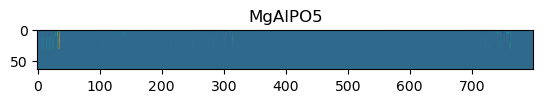

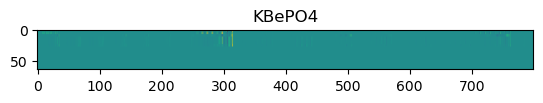

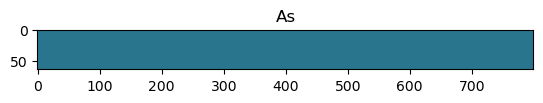

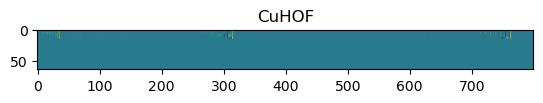

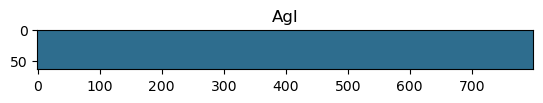

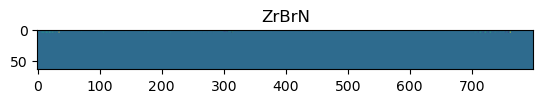

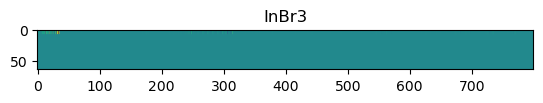

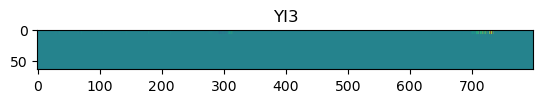

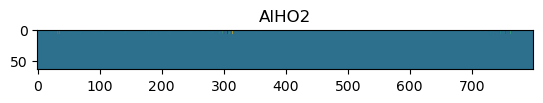

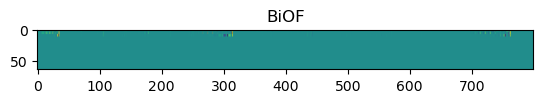

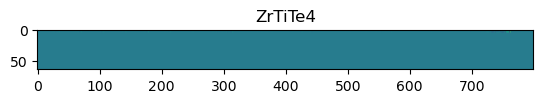

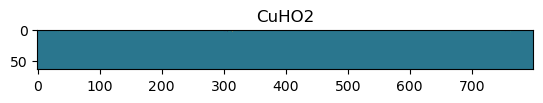

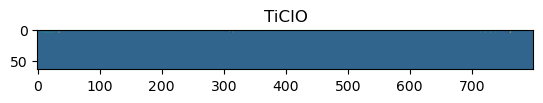

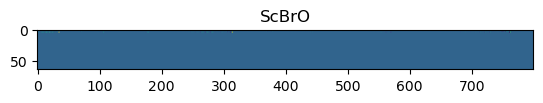

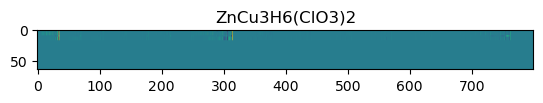

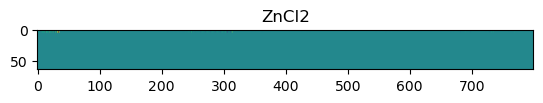

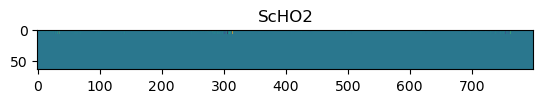

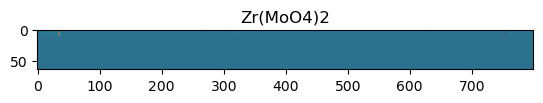

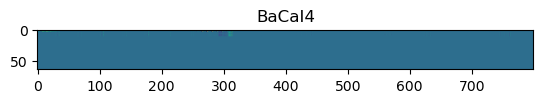

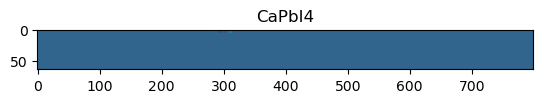

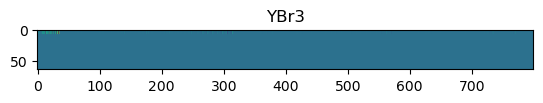

In [27]:
import matplotlib.pyplot as plt

for i, soap in enumerate(padded_df['padded_soap']):
    plt.imshow(soap)
    plt.title(f"{padded_df['formula'].iloc[i]}")
    # plt.colorbar()
    plt.show()
    if i == 20:
        break


In [4]:
# Assuming your input data is (num_samples, 64, 800)
X = np.array(padded_df['padded_soap'].tolist())
X = X[..., np.newaxis]  # Add a channel dimension -> (N, 64, 800, 1)

y = np.array(padded_df['gap opt'].tolist())  # regression target
print(X.shape, y.shape)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 800, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Single output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

(6744, 64, 800, 1) (6744,)


/Users/cadenmyers/miniconda3/envs/tfenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 798, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 399, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 397, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 198, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 177408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    22,708,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,727,297 (86.70 MB)

 Trainable params: 22,727,297 (86.70 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.fit(X, y, epochs=1, batch_size=32, validation_split=0.2)


169/169 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - loss: 9.7560 - mae: 1.7369 - val_loss: 2.7576 - val_mae: 1.3125


In [ ]:
loss, accuracy = model.evaluate(x=X, y=y, verbose=0)
print(accuracy, loss)

1.2847541570663452 2.914170026779175
